# MSCA 31010 HW4
# Sijie Li

# Import pacakge

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import sys
from scipy.stats import chi2
sys.path.append(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear')
import Regression


In [3]:
# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('precision', 10)
pandas.options.display.float_format = '{:,.7}'.format

# Data Manipulation

In [4]:
homeclaims = pandas.read_csv(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear\Wk7\Homeowner_Claim_History.csv')
print(homeclaims.columns)

Index(['policy', 'exposure', 'num_claims', 'amt_claims', 'f_primary_age_tier',
       'f_primary_gender', 'f_marital', 'f_residence_location',
       'f_fire_alarm_type', 'f_mile_fire_station', 'f_aoi_tier'],
      dtype='object')


In [5]:
homeclaims.head(5)

,policy,exposure,num_claims,amt_claims,f_primary_age_tier,f_primary_gender,f_marital,f_residence_location,f_fire_alarm_type,f_mile_fire_station,f_aoi_tier
0,P00001,1.0,0,0.00,21 - 27,Male,Married,Urban,Alarm Service,< 1 mile,351K - 600K
1,G00002,1.0,0,0.00,38 - 60,Male,Un-Married,Suburban,None,1 - 5 miles,< 100K
2,A00003,1.0,2,"3,079.01",38 - 60,Female,Married,Suburban,Standalone,< 1 mile,100K - 350K
3,P00004,1.0,1,804.87,28 - 37,Female,Un-Married,Suburban,Standalone,1 - 5 miles,< 100K
4,G00005,1.0,1,638.74,28 - 37,Female,Un-Married,Suburban,Alarm Service,< 1 mile,100K - 350K


In [6]:
homeclaims['amt_claims'] = homeclaims['amt_claims'].str.replace(',','').astype('float')

In [7]:
homeclaims['num_claims'] = homeclaims['num_claims'].astype('float')

In [8]:
homeclaims['severity'] = homeclaims['amt_claims'] // homeclaims['num_claims']

In [9]:
homeclaims.head(5)

,policy,exposure,num_claims,amt_claims,f_primary_age_tier,f_primary_gender,f_marital,f_residence_location,f_fire_alarm_type,f_mile_fire_station,f_aoi_tier,severity
0,P00001,1.0,0.0,0.0,21 - 27,Male,Married,Urban,Alarm Service,< 1 mile,351K - 600K,NaN
1,G00002,1.0,0.0,0.0,38 - 60,Male,Un-Married,Suburban,None,1 - 5 miles,< 100K,NaN
2,A00003,1.0,2.0,"3,079.01",38 - 60,Female,Married,Suburban,Standalone,< 1 mile,100K - 350K,"1,539.0"
3,P00004,1.0,1.0,804.87,28 - 37,Female,Un-Married,Suburban,Standalone,1 - 5 miles,< 100K,804.0
4,G00005,1.0,1.0,638.74,28 - 37,Female,Un-Married,Suburban,Alarm Service,< 1 mile,100K - 350K,638.0


In [10]:
for x in homeclaims.columns:
    #prinfting unique values
    print(x ,':', len(homeclaims[x].unique()))

policy : 27513
exposure : 100
num_claims : 7
amt_claims : 12147
f_primary_age_tier : 5
f_primary_gender : 2
f_marital : 3
f_residence_location : 3
f_fire_alarm_type : 3
f_mile_fire_station : 4
f_aoi_tier : 5
severity : 3412


In [11]:
homeclaims.dtypes

policy                   object
exposure                float64
num_claims              float64
amt_claims              float64
f_primary_age_tier       object
f_primary_gender         object
f_marital                object
f_residence_location     object
f_fire_alarm_type        object
f_mile_fire_station      object
f_aoi_tier               object
severity                float64
dtype: object

# Question 1

## a. Exploratary Data Analysis for all categorical data:

Generate horizontal boxplots of Total Claim Amount in a Year grouped by each of the seven categorical predictors f_primary_age_tier, f_primary_gender, f_marital, f_residence_location, f_fire_alarm_type, f_mile_fire_station, and f_aoi_tier.

In [12]:
import seaborn as sns


In [13]:
def cal_missing_val(df):
    data_dict = {}
    for col in df.columns:
        data_dict[col] = (df[col].isnull().sum()/df.shape[0])*100
    return pandas.DataFrame.from_dict(data_dict, orient='index', columns=['MissingValueInPercentage'].sort())

cal_missing_val(homeclaims).sort_values(by=0,ascending=False)

,0
severity,55.2248
policy,0.0
exposure,0.0
num_claims,0.0
amt_claims,0.0
f_primary_age_tier,0.0
f_primary_gender,0.0
f_marital,0.0
f_residence_location,0.0
f_fire_alarm_type,0.0


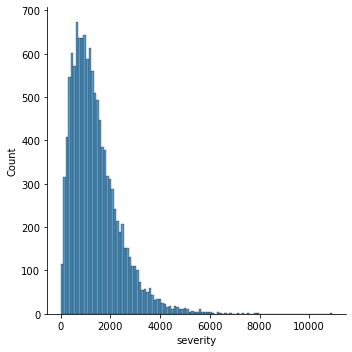

In [14]:
# Severity - Gamma distribution
sns.displot(homeclaims['severity'])

* More than 50% of the data in Severity is reported as NaN, which means no amount is reported. Besides that, most of the claims are concentrated bewteen 0 to 2000.

### categorical data:

f_marital, f_residence_location, f_fire_alarm_type, f_mile_fire_station, and f_aoi_tier.

<AxesSubplot:xlabel='f_residence_location', ylabel='amt_claims'>

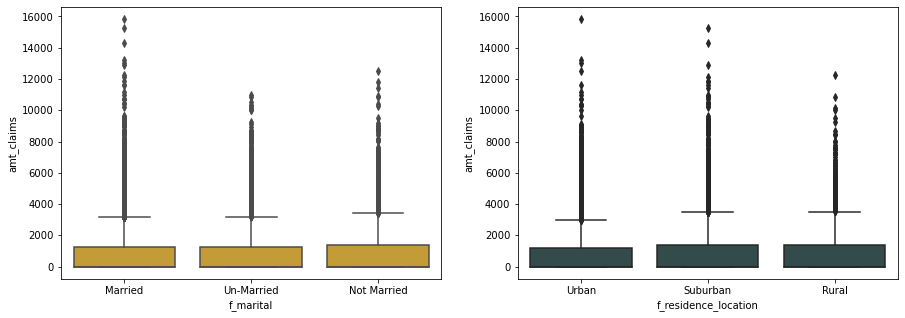

In [15]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.boxplot(x='f_marital',y='amt_claims', color='goldenrod',data=homeclaims, ax=ax[0])
sns.boxplot(x='f_residence_location',y='amt_claims', color='darkslategray',data=homeclaims)

* *Matrital group*: there are more outliers who filed more higher claim amounts in Married group. 
* *Residence location group*: Urban and Suburban have more outstanding outliers than Rural area, where Urban has a maximum claim at around $16k
* the median and range across all subgroups are very simiar

<AxesSubplot:xlabel='f_primary_gender', ylabel='amt_claims'>

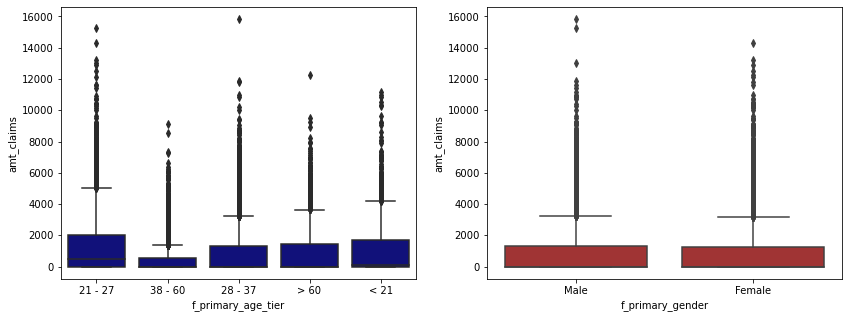

In [16]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(14,5))

sns.boxplot(x='f_primary_age_tier',y='amt_claims', color='darkblue',data=homeclaims,ax=ax[0])
sns.boxplot(x='f_primary_gender',y='amt_claims', color='firebrick',data=homeclaims)


* *Age group*: There is a obsivous gap among age tires. 21-27 has the majority in the range of 0 - 2000, but has good amounts of outliers.38 - 60 appears to be the most conservative age group with the outliers who account for the least amount of claims. the range of the box is also the narrowest. the rest of the age group were similar, besides one or few claims have reached the maximum of $16k.

* *Gender group*: the median and range look very similar, but the male has more and higher outliers than female.

<AxesSubplot:xlabel='f_aoi_tier', ylabel='amt_claims'>

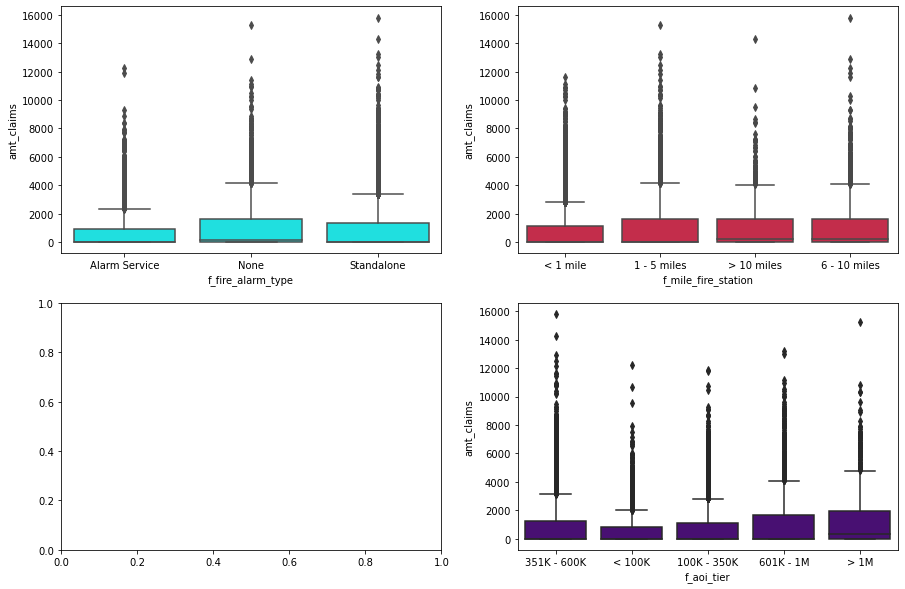

In [17]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(15,10))

sns.boxplot(x='f_fire_alarm_type',y='amt_claims', color='aqua',data=homeclaims,ax=ax[0,0])
sns.boxplot(x='f_mile_fire_station',y='amt_claims', color='crimson',data=homeclaims,ax=ax[0,1])
sns.boxplot(x='f_aoi_tier',y='amt_claims', color='indigo',data=homeclaims)

* *Fire alarm* group: the home without fire alarm has a higher median than the rest. 
* *Mile to fire station* group: the longer distance the home is away from fire station has a higher median than the one is less than 1 mile.
* *amount of insurance* group: the ones who insured > 1M reported higher median of claim amount. then following by the second most. 

## b. Apply Gamma GLM
For analyses, Severity will follow a Gamma distribution. Train a Gamma model with the logarithm link function.  The target variable is Severity (use only positive and non-missing values for analyses).  The predictors are the seven categorical predictors.  The model will include the Intercept term.  Enter predictors into the model using the Forward Selection method.  The entry threshold is 0.05.  What is the estimate for the Shape parameter?

In [15]:
# drop the NaN rows in Severity.
homeclaims2 = homeclaims.copy()

In [16]:
homeclaims2.shape

(27513, 12)

In [17]:
homeclaims2 = homeclaims2.dropna()

In [18]:
homeclaims2.shape

(12319, 12)

In [19]:
homeclaims2.columns

Index(['policy', 'exposure', 'num_claims', 'amt_claims', 'f_primary_age_tier',
       'f_primary_gender', 'f_marital', 'f_residence_location',
       'f_fire_alarm_type', 'f_mile_fire_station', 'f_aoi_tier', 'severity'],
      dtype='object')

In [20]:
catName = ['f_primary_age_tier',
       'f_primary_gender', 'f_marital', 'f_residence_location',
       'f_fire_alarm_type', 'f_mile_fire_station', 'f_aoi_tier']
intName = ['exposure', 'num_claims', 'amt_claims']

In [21]:
nPredictor = len(catName) + len(intName)

In [22]:
yName = 'severity'

In [235]:
trainData = homeclaims2[catName + intName + [yName]]

In [236]:
# Reorder the categories of the categorical variables in ascending frequency
for pred in catName:
    u = trainData[pred].astype('category').copy()
    u_freq = u.value_counts(ascending = True)
    trainData[pred] = u.cat.reorder_categories(list(u_freq.index)).copy()

In [238]:
# Generate a column of Intercept
X0_train = trainData[[yName]].copy()
X0_train.insert(0, 'Intercept', 1.0)
X0_train.drop(columns = [yName], inplace = True)
y_train = trainData[yName]
maxIter = 20
tolS = 1e-7
stepSummary = pandas.DataFrame()

In [26]:
y_train.dtypes

dtype('float64')

In [239]:
# Intercept only model
resultList = Regression.GammaModel (X0_train, y_train, offset = None, maxIter = maxIter, tolSweep = tolS)
llk0 = resultList[3]
df0 = len(resultList[4])
stepSummary = stepSummary.append([['Intercept', ' ', df0, llk0, numpy.NaN, 
numpy.NaN, numpy.NaN]], ignore_index = True)
stepSummary.columns = ['Predictor', 'Type', 'ModelDF', 'ModelLLK', 'DevChiSq', 
'DevDF', 'DevSig']

In [240]:
print('======= Step Detail =======')
print('Step = ', 0)
print('Step Statistics:')
print(stepSummary)

======= Step Detail =======
Step =  0
Step Statistics:
   Predictor Type  ModelDF   ModelLLK  DevChiSq  DevDF  DevSig
0  Intercept             1 -99,941.16       NaN    NaN     NaN


In [243]:
cName = catName.copy()
#iName = intName.copy()
entryThreshold = 0.05

In [244]:
for step in range(nPredictor):
    enterName = ''
    stepDetail = pandas.DataFrame()
    # Enter the next predictor
    for X_name in cName:
        X_train = pandas.get_dummies(trainData[[X_name]])
        X_train = X0_train.join(X_train)
        resultList = Regression.GammaModel (X_train, y_train, offset = None, 
maxIter = maxIter, tolSweep = tolS)
        llk1 = resultList[3]
        df1 = len(resultList[4])
        devChiSq = 2.0 * (llk1 - llk0)
        devDF = df1 - df0
        devSig = chi2.sf(devChiSq, devDF)
        stepDetail = stepDetail.append([[X_name, 'categorical', df1, llk1, 
devChiSq, devDF, devSig]], ignore_index = True)
    
    stepDetail.columns = ['Predictor', 'Type', 'ModelDF', 'ModelLLK', 'DevChiSq', 
'DevDF', 'DevSig']
        # Find a predictor to enter, if any
    stepDetail.sort_values(by = ['DevSig', 'ModelLLK'], axis = 0, ascending = 
[True, False], inplace = True)
    enterRow = stepDetail.iloc[0].copy()
    minPValue = enterRow['DevSig']
    if (minPValue <= entryThreshold):
        stepSummary = stepSummary.append([enterRow], ignore_index = True)
        df0 = enterRow['ModelDF']
        llk0 = enterRow['ModelLLK']
        enterName = enterRow['Predictor']
        enterType = enterRow['Type']
        if (enterType == 'categorical'):
            X_train = pandas.get_dummies(trainData[[enterName]].astype('category'))
            X0_train = X0_train.join(X_train)
            cName.remove(enterName)
    else:
        break

In [32]:
# Print debugging output
print('======= Step Detail =======')
print('Step = ', step+1)
print('Step Statistics:')
print(stepDetail)
print('Enter predictor = ', enterName)
print('Minimum P-Value =', minPValue)
print('\n')

======= Step Detail =======
Step =  6
Step Statistics:
          Predictor         Type  ModelDF   ModelLLK  DevChiSq  DevDF     DevSig
1         f_marital  categorical       18 -99,583.32  5.599069      2 0.06083838
0  f_primary_gender  categorical       17 -99,585.83 0.5803873      1  0.4461606
Enter predictor =  
Minimum P-Value = 0.06083838404482265




## c. Step Summary Table
Provide the Step Summary table.  The table should contain (1) Step Number, (2) Model Degrees of Freedom, (3) Model Log-Likelihood, (4) Deviance Chi-Squares, (5) Deviance Degrees of Freedom, and (6) Deviance Significance.  Show the Significance in .E7 scientific notation.  

In [33]:
# End of forward selection
print('======= Step Summary =======')
print(stepSummary)

======= Step Summary =======
              Predictor         Type  ModelDF   ModelLLK  DevChiSq  DevDF       DevSig
0             Intercept                     1 -99,941.16       NaN    NaN          NaN
1    f_primary_age_tier  categorical        5 -99,739.08  404.1741    4.0 3.486526e-86
2            f_aoi_tier  categorical        9 -99,680.09  117.9793    4.0 1.442752e-24
3     f_fire_alarm_type  categorical       11 -99,644.07  72.04075    2.0 2.272737e-16
4   f_mile_fire_station  categorical       14 -99,611.05  66.03657    3.0 3.010275e-14
5  f_residence_location  categorical       16 -99,586.12  49.85636    2.0 1.492208e-11


The model likelihood among all steps are very close to each other, where f_primary_age_tier is at the most significant level. The two predictor (marital status and gendel) do not have significant association with the target variables.

## d. Model Performance Metrics
Assess the final model goodness-of-fit using (1) Root Mean Squared Error, (2) Relative Error, (3) Mean Absolute Proportion Error, and (4) Pearson Correlation.  What are the values of these metrics?

In [34]:
# Final model
resultList = Regression.GammaModel (X0_train, y_train, offset = None, maxIter = 
maxIter, tolSweep = tolS)
outCoefficient = resultList[0]
alpha = resultList[7]
y_pred = resultList[6]

In [35]:
# Simple Residual
y_simple_residual = y_train - y_pred

In [36]:
# Mean Absolute Proportion Error
ape = numpy.abs(y_simple_residual) / y_train
mape = numpy.mean(ape)
print('Mean Absollute Proportion Error = ',mape)

Mean Absollute Proportion Error =  1.2165757845879388


In [37]:
# Root Mean Squared Error
mse = numpy.mean(numpy.power(y_simple_residual, 2))
rmse = numpy.sqrt(mse)
print('Root Mean Squared Error = ',rmse)

Root Mean Squared Error =  942.3003216229016


In [38]:
# Relative Error
relerr = mse / numpy.var(y_train, ddof = 0)
print('Relative Error = ',relerr)

Relative Error =  0.9468725488592082


In [39]:
# Pearson correlation
corr_matrix = numpy.corrcoef(y_train, y_pred)
pearson_corr = corr_matrix[0,1]
#rsq = pearson_corr ** 2
print('Relative Error = ',pearson_corr)

Relative Error =  0.23052195837275888


## e. Ploting and Summary
Identify any poorly predicted observations.  First, plot the predicted versus the observed Severity.  Second, together in a single chart frame, plot the Simple Residuals, the Pearson Residuals, the Deviance Residuals, and the Absolute Proportion Errors versus the observed Severity. Label the axes of these two charts accordingly.  To receive full credits, generate your charts with proper dimensions (e.g., length and width) and resolution (e.g., dpi).

### Plot Observed Severity vs. Predicted Severity

Text(0, 0.5, 'Predicted Severity')

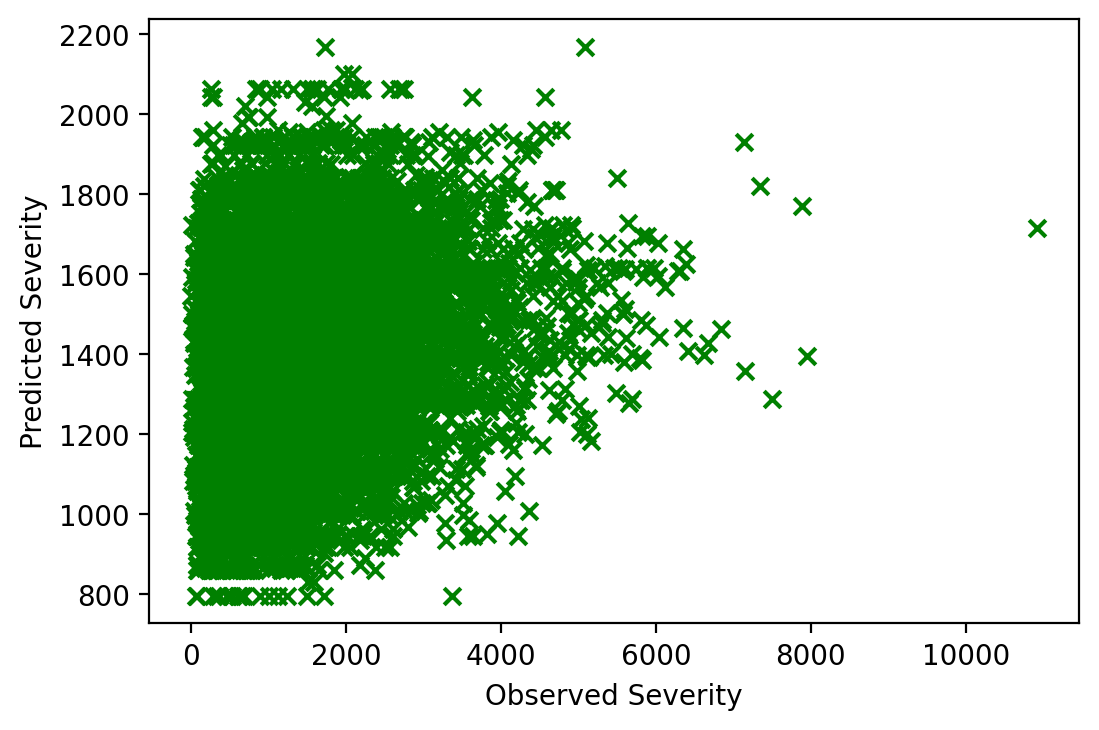

In [54]:
fig = plt.subplots (dpi=200)
plt.scatter(y_train,y_pred, c = 'green', marker = 'x')
plt.xlabel('Observed Severity')
plt.ylabel('Predicted Severity')


From the chart, we can see the highest dentisty across observed vesus predicted is on the left part of the chart. When observed is less than 2000, the predicted is between 800 - 2000. This area counts for more true positive cases. However, there are some poor prediction outside of 0-2000 range. The most outstanding one is when observed is over 10000, it still predicted as 1800. In general, when serverity is  higher than 2000, the model tends to precited the servertity low.   

### Simple Residuals, the Pearson Residuals, the Deviance Residuals, and the Absolute Proportion Errors versus the observed Severity.

In [56]:
# Pearson Residual
y_pearson_residual = y_simple_residual / numpy.sqrt(y_pred)

# Deviance Residual
r_vec = y_train / y_pred
di_2 = 2* (r_vec - numpy.log(r_vec) - 1)
y_deviance_residual = numpy.where(y_simple_residual > 0, 1.0, -1.0) * numpy.sqrt(di_2)


In [69]:
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20'}

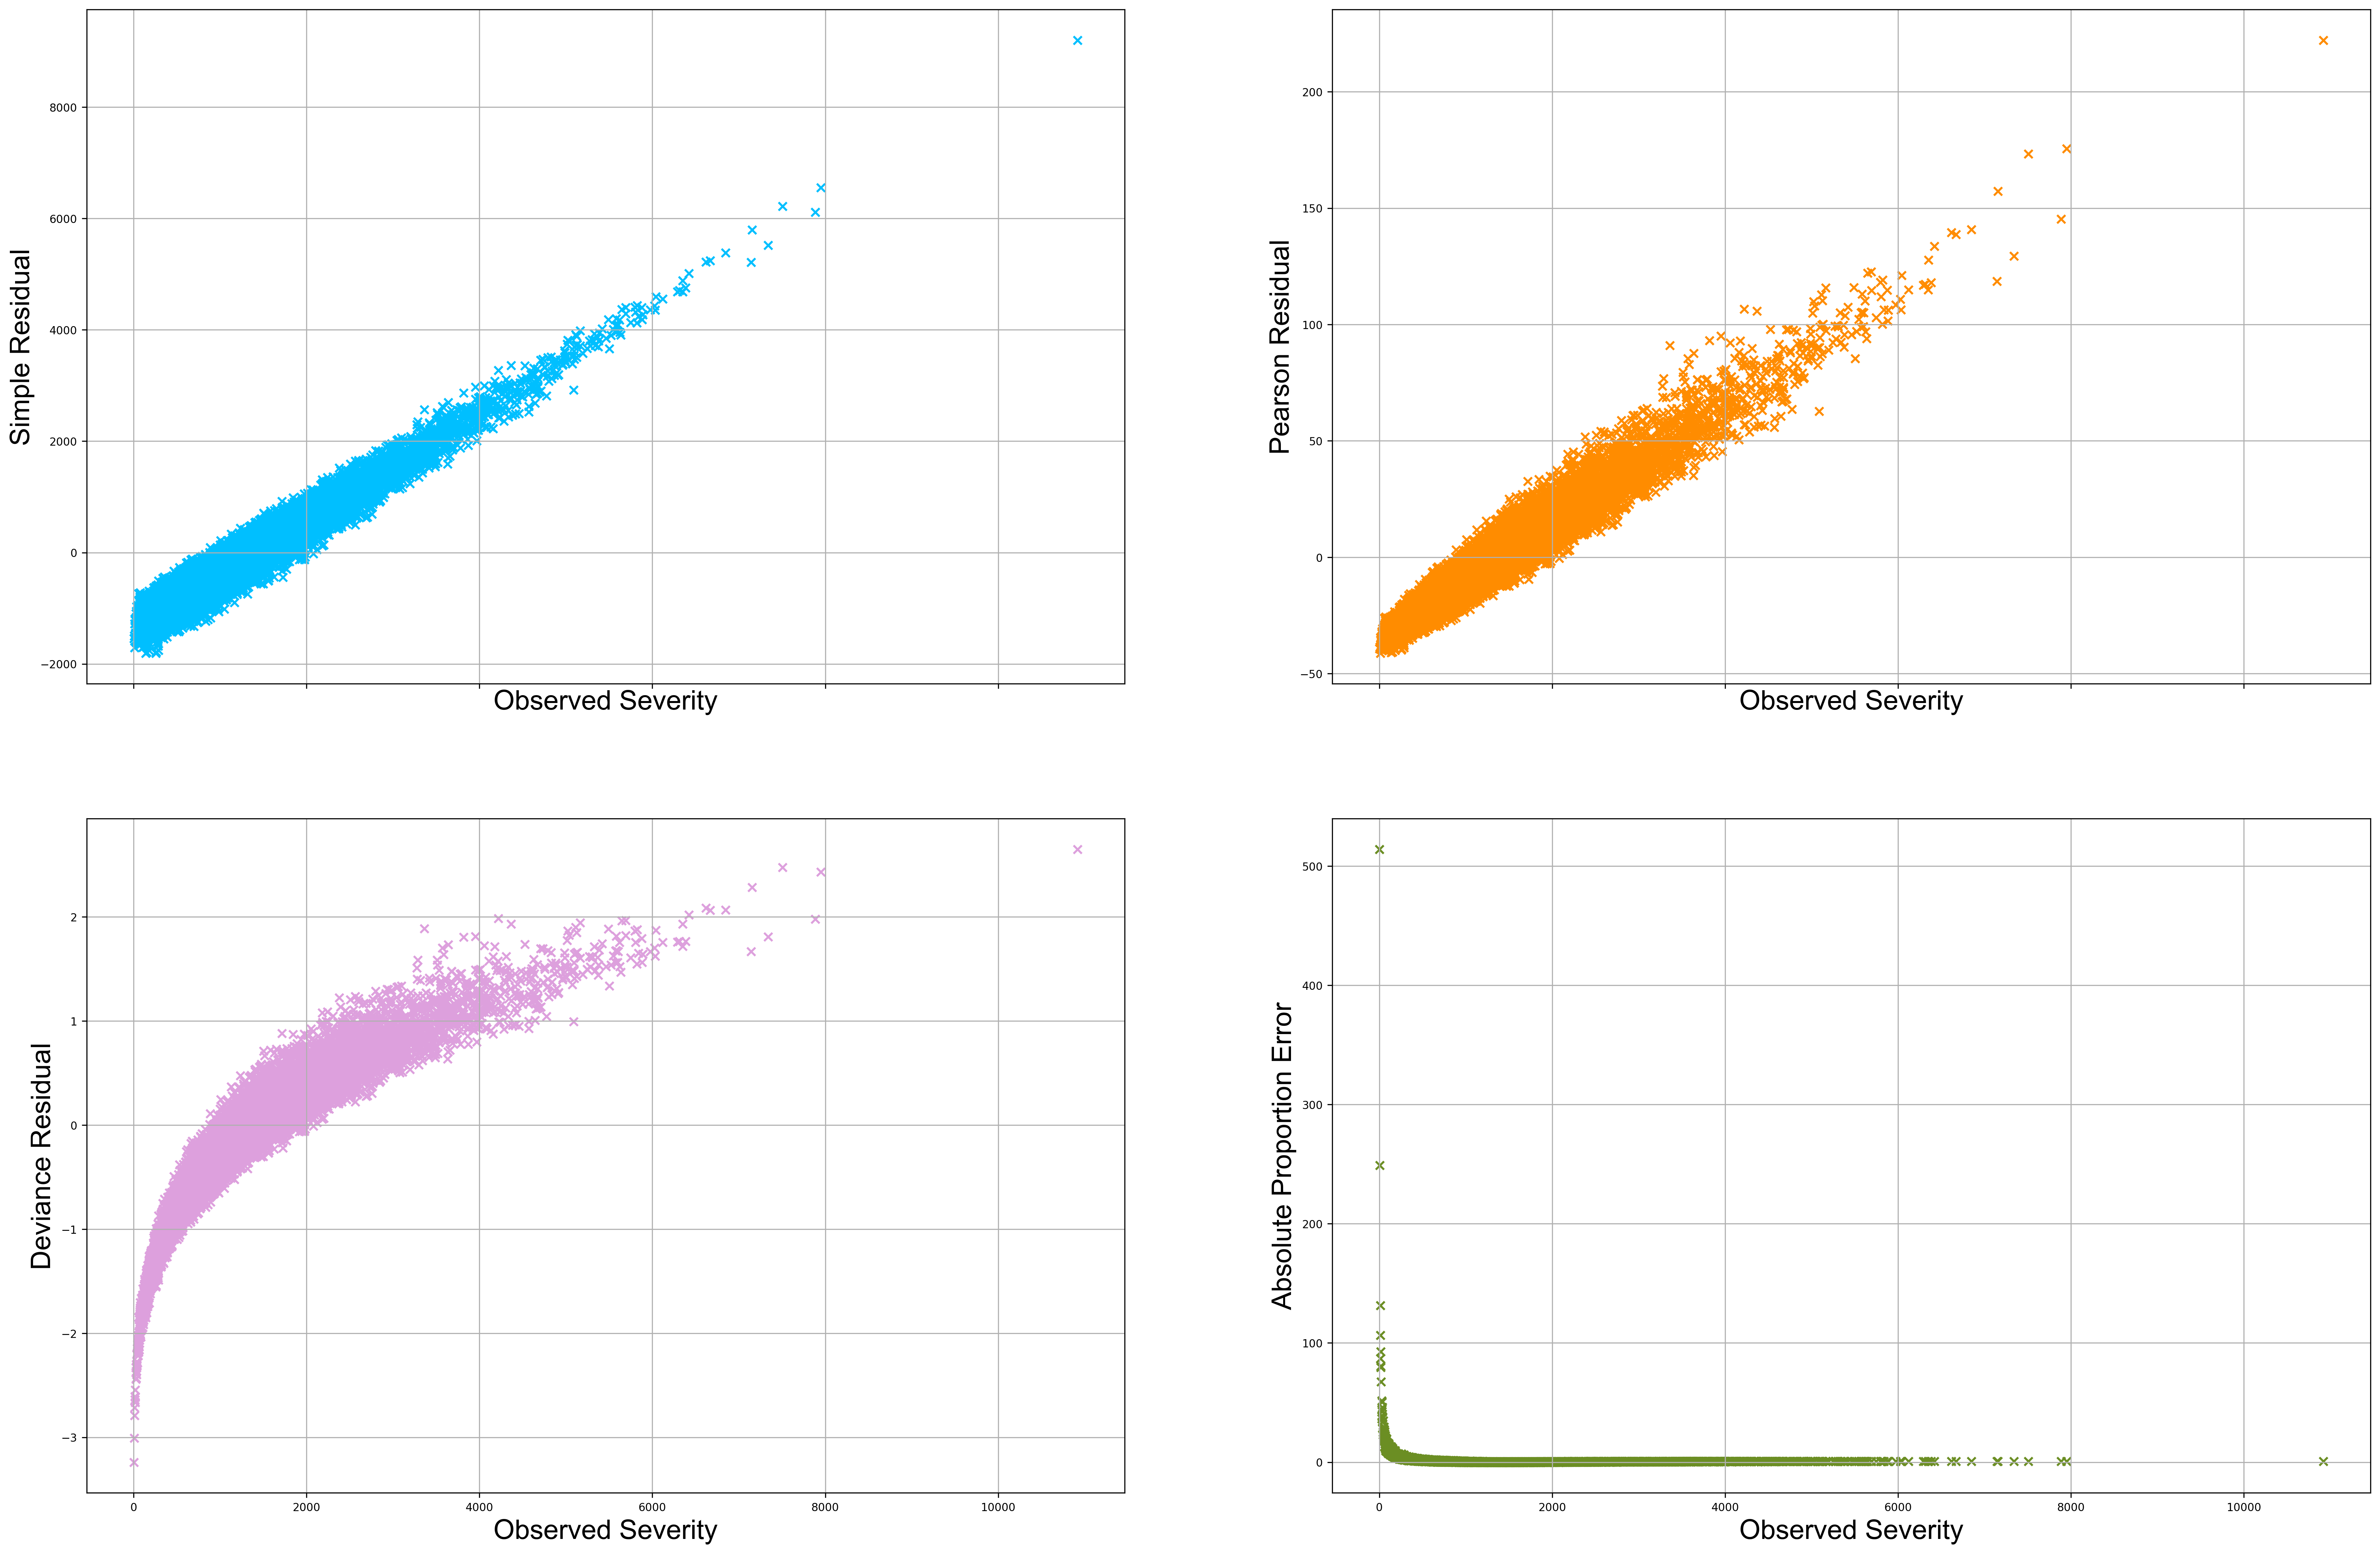

In [70]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2, ncols = 2, dpi = 300, 
sharex = True,figsize = (30,20))

# Plot simple residuals versus observed sale price
ax0.scatter(y_train, y_simple_residual, c = 'deepskyblue', marker = 'x')
ax0.set_xlabel('Observed Severity',**axis_font)
ax0.set_ylabel('Simple Residual',**axis_font)
ax0.xaxis.grid(True)
ax0.yaxis.grid(True)

# Plot Pearson residuals versus observed sale price
ax1.scatter(y_train, y_pearson_residual, c = 'darkorange', marker = 'x')
ax1.set_xlabel('Observed Severity',**axis_font)
ax1.set_ylabel('Pearson Residual',**axis_font)
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

# Plot deviance residuals versus observed sale price
ax2.scatter(y_train, y_deviance_residual, c = 'plum', marker = 'x')
ax2.set_xlabel('Observed Severity',**axis_font)
ax2.set_ylabel('Deviance Residual',**axis_font)
ax2.xaxis.grid(True)
ax2.yaxis.grid(True)

# Plot absolute proportion error versus actual value
ax3.scatter(y_train, ape, c = 'olivedrab', marker = 'x')
ax3.set_xlabel('Observed Severity',**axis_font)
ax3.set_ylabel('Absolute Proportion Error',**axis_font)
ax3.xaxis.grid(True)
ax3.yaxis.grid(True)

plt.show()

It has been confirmed the poorest predcition when observed serverity is over 10000

# Question 2

## a Multi-layer Perceptron Neural network
Train a Multi-Layer Perceptron neural network.  The target variable is Severity (use only positive and non-missing values for analyses).  The predictors are the seven categorical predictors.  Perform a naïve grid search to select the best network structure.  For each Hyperbolic Tangent and Rectified Linear Unit activation function, try the number of layers from 1 to 10, the common number of neurons per layer from 1 to 5.  Provide a table that shows your grid search results.  The table should contain (1) the activation function type, (2) the number of layers, (3) the common number of neurons per layer, (4) the total number of neurons, and (5) the mean absolute proportion error.

In [100]:
import sklearn.neural_network as nn
import time
import itertools

In [71]:
import sklearn.neural_network as nn
import sklearn.metrics as metrics

In [177]:
import warnings
warnings.filterwarnings("ignore")

In [253]:
X_train = X_train.reset_index()

In [254]:
X_train = X_train.astype('float')

In [255]:
X_train = X_train.drop(['Intercept'],axis=1)

In [257]:
y = y_train.astype('int')

In [258]:
y = numpy.array(y)

In [260]:
y = y.reshape(-1,1)

In [317]:
result = pandas.DataFrame()
actFunc = ['relu','tanh']
nLayer = range(1,11,1)
nHiddenNeuron = range(1,6,1)
combList = itertools.product(actFunc, nLayer, nHiddenNeuron)

In [318]:
for comb in combList:
    actFunc = comb[0]
    nLayer = comb[1]
    nHiddenNeuron = comb[2]
    nnObj = nn.MLPRegressor(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
                            activation = actFunc, verbose = False,solver = 'lbfgs', learning_rate_init = 0.1,
                            max_iter = 10000, random_state = 20220301)
    thisFit = nnObj.fit(X_train, y)
    y_pred = nnObj.predict(X_train)
    #Loss = nnObj.loss_
    #RSquare = metrics.r2_score(y_scaled, y_pred)
    y_simple_residual = y - y_pred
    ape = numpy.abs(y_simple_residual) / y
    mape = numpy.mean(ape)
    nNeuron = nHiddenNeuron*nLayer + 7
    result = result.append([[actFunc ,nLayer, nHiddenNeuron,nNeuron, mape]], ignore_index = True)

In [319]:
result.columns = ['Activation Function','nLayer', 'nHiddenNeuron','Total Neuron','Mean Absolute Proportion Error' ]

In [320]:
result.sort_values(by='Mean Absolute Proportion Error')

,Activation Function,nLayer,nHiddenNeuron,Total Neuron,Mean Absolute Proportion Error
33,relu,7,4,35,1.117897
43,relu,9,4,43,1.127454
49,relu,10,5,57,1.12916
19,relu,4,5,27,1.132835
29,relu,6,5,37,1.133668
...,...,...,...,...,...
39,relu,8,5,47,1.273433
9,relu,2,5,17,1.275266
28,relu,6,4,31,1.284355
14,relu,3,5,22,1.284562


## b The best network structure
Recommend the best network structure which yields the lowest Mean Absolute Proportion Error.  In the case of ties, choose the network with a fewer total number of neurons.

From the grid search, we found this combination had the smallest MAPE
Activation Function is Relu

N layer = 7

N hidden Neuron = 4

Total Neuron = 35

## c Model Performance
Assess the final model goodness-of-fit using (1) Root Mean Squared Error, (2) Relative Error, (3) Mean Absolute Proportion Error, and (4) Pearson Correlation.  What are the values of these metrics?

In [321]:
# Root Mean Squared Error
mse2 = numpy.mean(numpy.power(y_simple_residual, 2))
rmse2 = numpy.sqrt(mse)
print('Root Mean Squared Error = ',rmse2)

Root Mean Squared Error =  968.375016513818


In [322]:
# Relative Error
relerr2 = mse / numpy.var(y, ddof = 0)
print('Relative Error = ',relerr2)

Relative Error =  1.0000000000000029


In [323]:
# Mean Absolute Proportion Error
ape2 = numpy.abs(y_simple_residual) / y
mape2 = numpy.mean(ape2)
print('Mean Absollute Proportion Error = ',mape2)

Mean Absollute Proportion Error =  1.2728793250179067


In [324]:
# Pearson correlation
corr_matrix2 = numpy.corrcoef(y_train, y_pred)
pearson_corr2 = corr_matrix[0,1]
#rsq = pearson_corr ** 2
print('pearson_corrr = ',pearson_corr)

pearson_corrr =  -3.412488682327705e-16


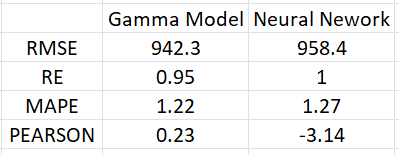
Comparing all the error performance across Gamma Model and ANN model, and found out ANN has higher error performance than Gamma Model

## d Ploting and Summary
Identify any poorly predicted observations.  First, plot the predicted versus the observed Severity.  Second, together in a single chart frame, plot the Simple Residuals, the Pearson Residuals, and the Absolute Proportion Errors versus the observed Severity. Label the axes of these two charts accordingly.  To receive full credits, generate your charts with proper dimensions (e.g., length and width) and resolution (e.g., dpi).

***y and y_train has the same value but in different format***

In [325]:
y_simple_residual = y_train - y_pred

In [326]:
# Pearson Residual
y_pearson_residual = y_simple_residual / numpy.sqrt(y_pred)

# Deviance Residual
r_vec = y_train / y_pred
di_2 = 2* (r_vec - numpy.log(r_vec) - 1)
y_deviance_residual = numpy.where(y_simple_residual > 0, 1.0, -1.0) * numpy.sqrt(di_2)

In [327]:
ape = numpy.abs(y_simple_residual) / y_train

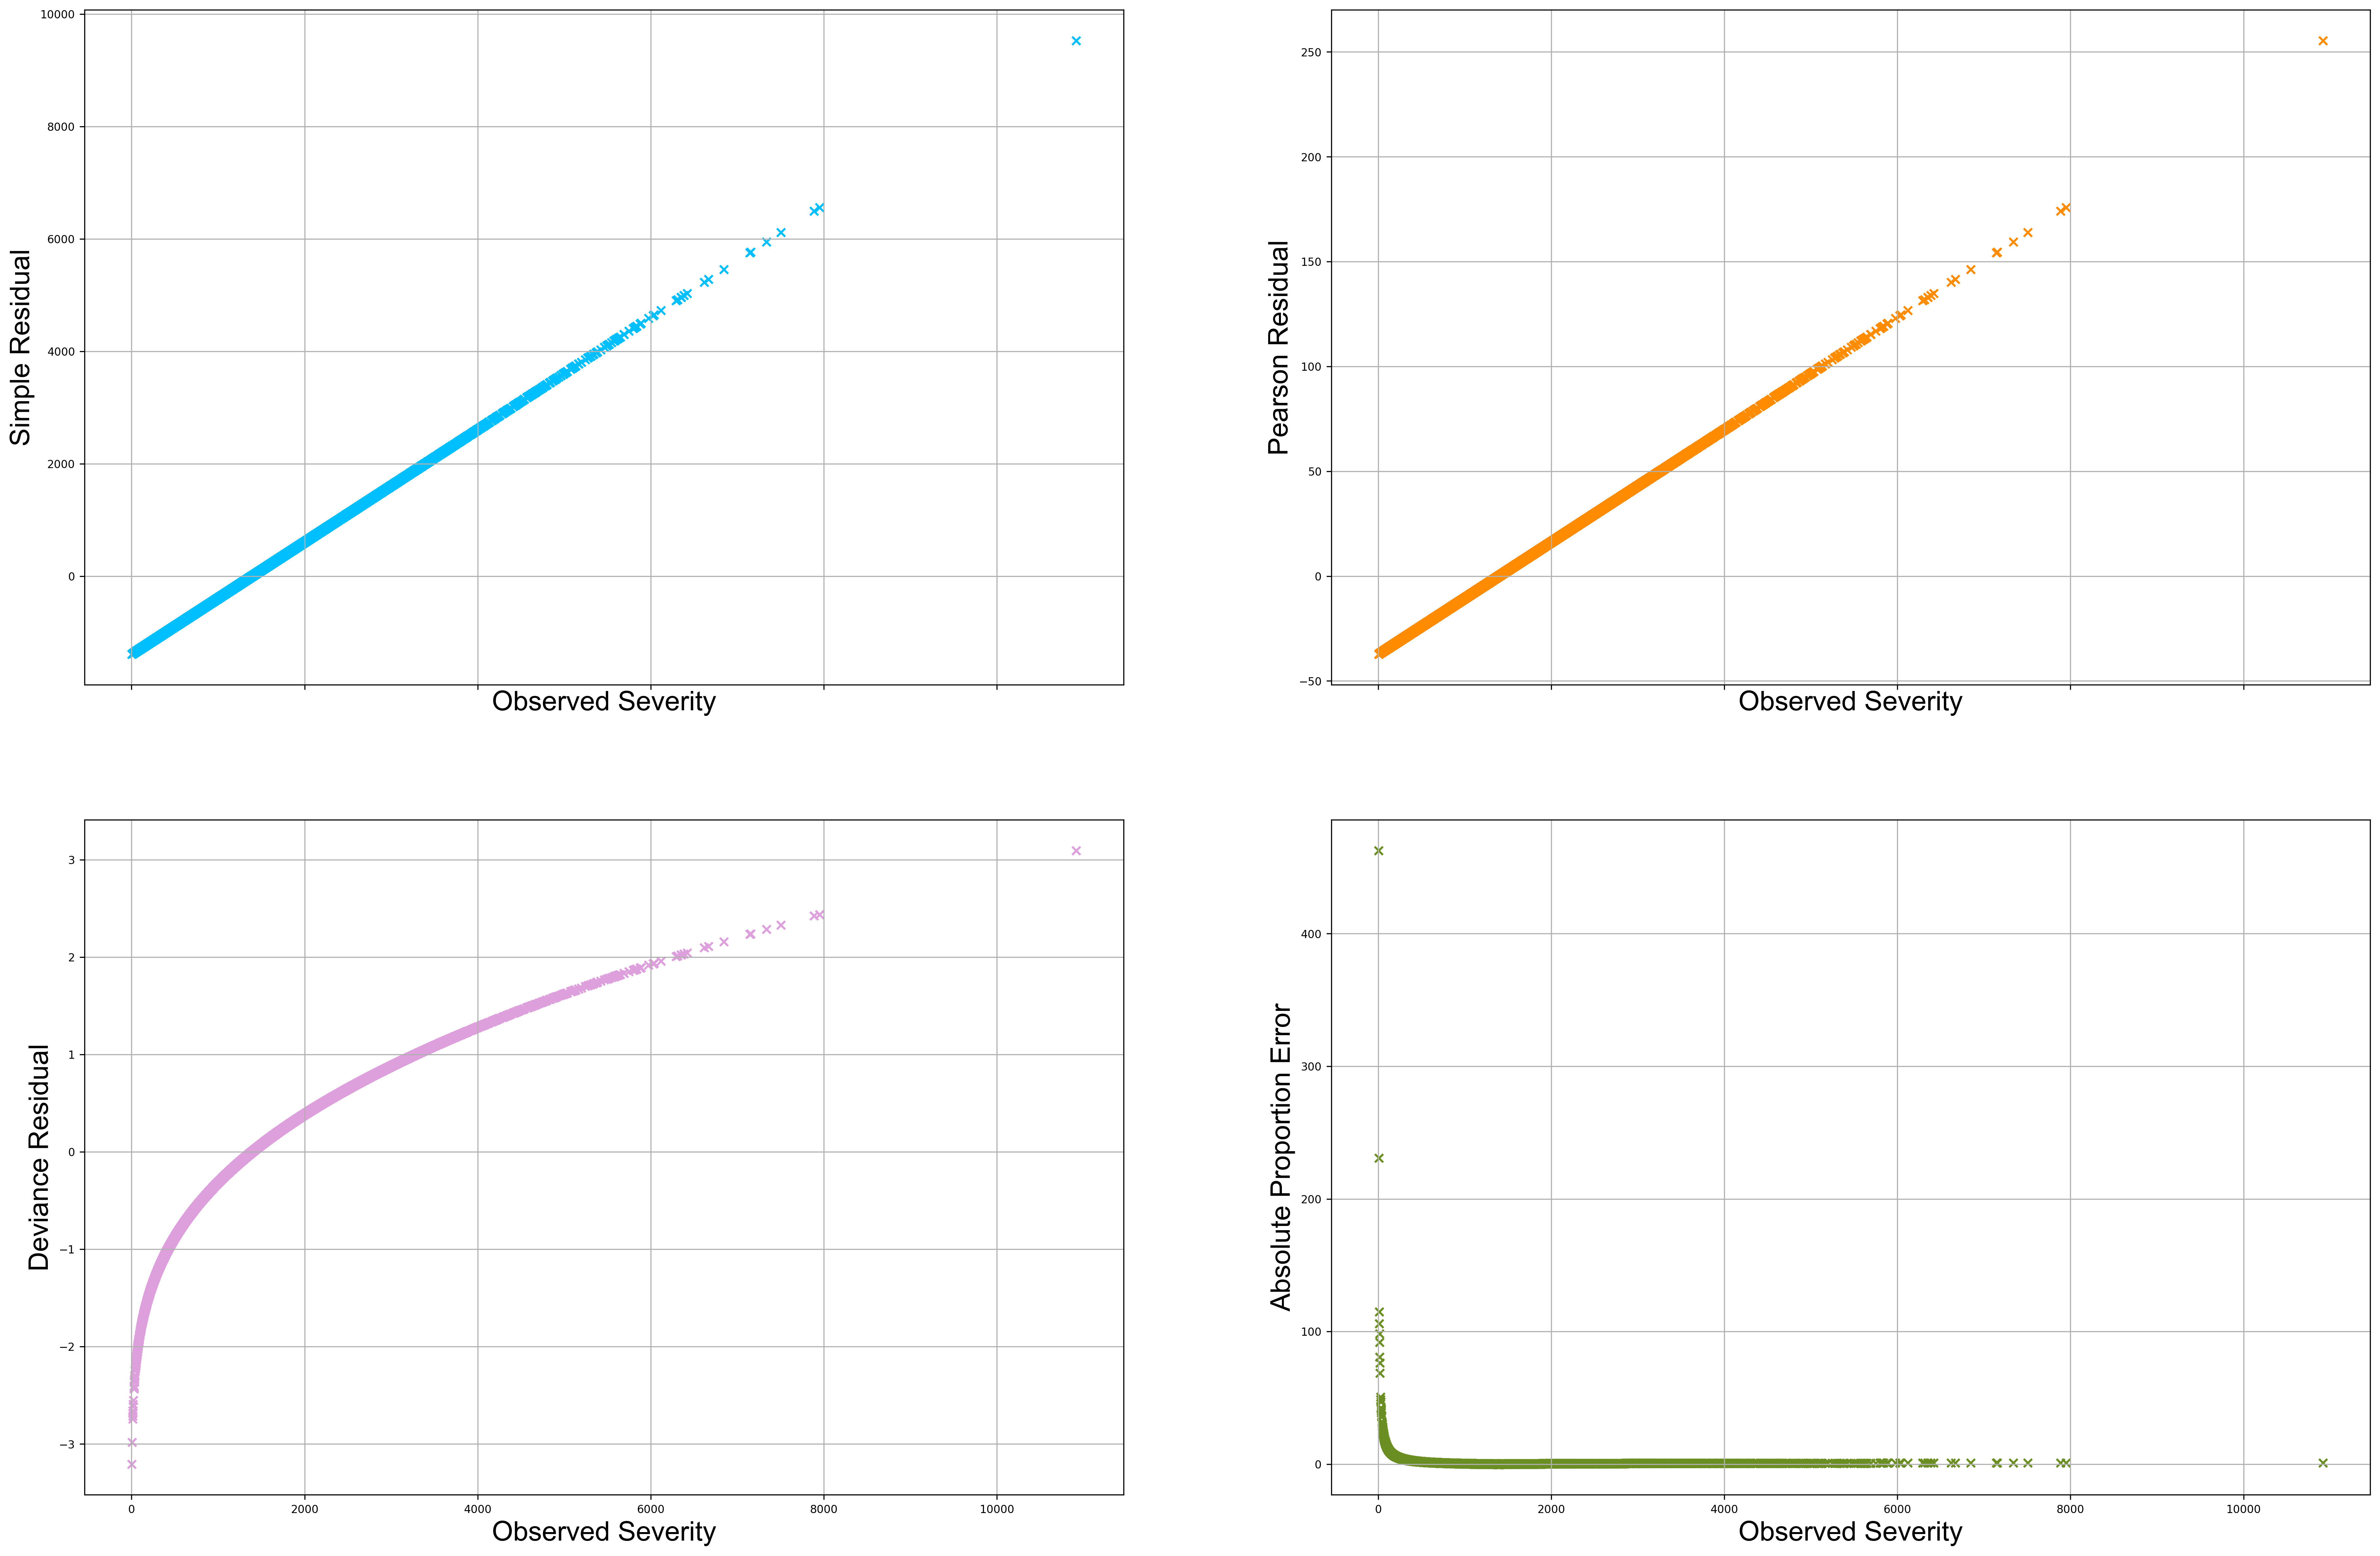

In [328]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2, ncols = 2, dpi = 300, 
sharex = True,figsize = (30,20))

# Plot simple residuals versus observed sale price
ax0.scatter(y_train, y_simple_residual, c = 'deepskyblue', marker = 'x')
ax0.set_xlabel('Observed Severity',**axis_font)
ax0.set_ylabel('Simple Residual',**axis_font)
ax0.xaxis.grid(True)
ax0.yaxis.grid(True)

# Plot Pearson residuals versus observed sale price
ax1.scatter(y_train, y_pearson_residual, c = 'darkorange', marker = 'x')
ax1.set_xlabel('Observed Severity',**axis_font)
ax1.set_ylabel('Pearson Residual',**axis_font)
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

# Plot deviance residuals versus observed sale price
ax2.scatter(y_train, y_deviance_residual, c = 'plum', marker = 'x')
ax2.set_xlabel('Observed Severity',**axis_font)
ax2.set_ylabel('Deviance Residual',**axis_font)
ax2.xaxis.grid(True)
ax2.yaxis.grid(True)

# Plot absolute proportion error versus actual value
ax3.scatter(y_train, ape, c = 'olivedrab', marker = 'x')
ax3.set_xlabel('Observed Severity',**axis_font)
ax3.set_ylabel('Absolute Proportion Error',**axis_font)
ax3.xaxis.grid(True)
ax3.yaxis.grid(True)

plt.show()

ANN model predicted the poor prediction the same as in Gamma Model. Besides that, the line in each chart appears to be straight and narrower than the ones in Gamma Model. 

In general, the dataset can be ran on both models with good performance. The error differences between the two models are small. However, I would prefer Gamma Model because it is more obvious to see the feature selection. ANN model tends to add complexity, which is not necessary. To sum up, further measurement needs to be done including the prediction accuracy level and the so on.